# 1D FDM - Electrostatics in Cylindrical Coordinates

## TODO
1. Finish theory on boundary conditions
2. Add configuration description to examples

# Theory

## Magnetoquasistatics
Under quasi-static conditions, the coupling between the electric and magnetic field is neglected. For the magnetic field this leaves the following equations:
$$ \left\{ \begin{array}{l}
    \nabla \times \mathbf{H} = \mathbf{J} \\
    \nabla \cdot \mathbf{B} = 0 \implies \mathbf{B} = \nabla \times \mathbf{A} \\
    \mathbf{B} = \mu \mathbf{H}
\end{array} \right. $$
Let $\nu = \frac{1}{\mu}$ be the reluctivity.

## Formulation in 1D Cylindrical Coordinates
Consider the geometry under investigation invariant in the $\phi$ and $z$ directions. Note that this means that the $\mathbf{A}$ vector will be in the $\phi$ direction (into or out of the screen), and $\mathbf{B}$ and $\mathbf{H}$ in the $z$ direction (up or down). The differential equations reduce to
$$ J_{\phi} = -\frac{\partial H_z}{\partial r} \qquad B_z = \frac{1}{r} \frac{\partial}{\partial r} (r A_{\phi}) \qquad H_z = \nu B_z$$
Let the unknown be $u = \frac{A_\phi}{r}$, this will eliminate the division by $r$ in the final differential equations. Substituting all the equations, we obtain
\begin{align*}
    -J_\phi & = \frac{\partial}{\partial r} \left[ \frac{\nu(r)}{r} \frac{\partial (r^2 u)}{\partial r} \right] \\
     & = \frac{\partial}{\partial r} \left[ r \nu(r) \frac{\partial u}{\partial r} + 2 \nu(r) u \right] \\
     & = \frac{\partial}{\partial r} \left[ r \nu(r) \frac{\partial u}{\partial r} \right] + 2 \frac{\partial}{\partial r} \left[ \nu(r) u \right]
\end{align*}

## Finite Difference Approximation
Let $f(r) = -J_\phi$ be the source function (current density), $c(r) = \nu(r)$ the variable diffusion coefficient representing the reluctivity of the material, and $u(r) = \frac{A_\phi}{r}$ the unknown. Discretizing the differential equation using the finite difference approximation, we obtain
$$\frac{1}{h^2}\left[ r_{i-0.5} c_{i-0.5} u_{i-1} - (r_{i+0.5} c_{i+0.5} + r_{i-0.5} c_{i-0.5}) u_i + r_{i+0.5} c_{i+0.5} u_{i+1} \right] + \frac{c_i}{h} \left[ u_{i-1} - u_{i+1} \right] = f_i$$
Writing this in matrix form we obtain
$$ A u = f \qquad A = B^T \operatorname{diag}(r) D B + 2 C E $$
where $D$ and $E$ are diagonal matrices describing $c(r)$ on the midpoints and mesh nodes respectively. $B$ is the single derivative on the midpoints, and $C$ is the single derivative on the mesh nodes.

## Boundary Conditions


## Post-Processing
In post-processing, the magnetic vector potential, flux density, and flux can be obtained
\begin{align*}
    A_\phi & = r u \\
    B_z & = \frac{1}{r} \frac{\partial}{\partial r} (r A_\phi) = \frac{B (r A_\phi)}{r} \qquad \text{$B$ is derivative matrix} \\
    \Phi & = \int_{\partial S} \vec{A} \cdot d\vec{\ell} = 2\pi r A_\phi
\end{align*}

# Import packages

In [1]:
using LinearAlgebra
using Interpolations
using Plots
using LaTeXStrings

# Example 1: Coil in Air

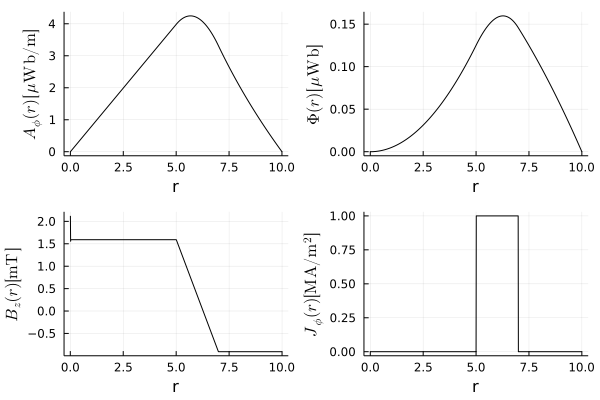

In [11]:
# Construct the 1D mesh
xmin = 0;
xmax = 10e-3;

N = 1000; Np1 = N+1; h = (xmax - xmin)/N; h2=h*h; 
x = Vector(xmin:h:xmax); 
xmid = x[1:end-1].+h/2; 

# Define source and material
f = 1e6 .* (x .< 7e-3) .* (5e-3 .< x);

mu0 = 4*pi*1e-7;
mu1 = 1e4*mu0;
mu(x) = mu0 .* ones(size(x));
D = mu(xmid);
E = mu(x);

D = 1 ./ D; E = 1 ./ E;

# Construct A and B matrices
B = Float64[i==j ? (-1.)/h : i==j-1 ? 1/h : 0 for i = 1:N, j=1:Np1]
BT = Transpose(B)
C = 1/(2*h) * Tridiagonal(ones(N), zeros(N+1), -ones(N));

A  = BT*Diagonal(xmid.*D)*B + 2 * C * Diagonal(E); 

# Boundary conditions
A[1,:] = zeros(N+1);
A[1,1] = 1;            A[1,2] = 0;             f[1] = 0;   # Axisymmetry
A[end,end-1] = 0;      A[end,end] = 1;         f[end] = 0; # A=0 

# 
u   = A \ f;
u   = u .* x;
ux   = (B * (x .* u)) ./ xmid;

p1 = plot(x * 1e3, u * 1e6, color = :black, xlabel = "r", ylabel = L"A_{\phi}(r) [\mathrm{\mu Wb/m}]", legend = false);
p2 = plot(x * 1e3, 2*pi*x.*u * 1e6, color = :black, xlabel = "r", ylabel = L"\Phi(r) [\mathrm{\mu Wb}]", legend = false);
p3 = plot(xmid * 1e3, ux * 1e3, color = :black, xlabel = "r", ylabel = L"B_z(r) \mathrm{[mT]}", legend = false);
p4 = plot(x * 1e3, f * 1e-6, color = :black, xlabel = "r", ylabel = L"J_{\phi}(r) \mathrm{[MA/m^2]}", legend = false);

plot(p1, p2, p3, p4)

# Example 2: Coil with Core

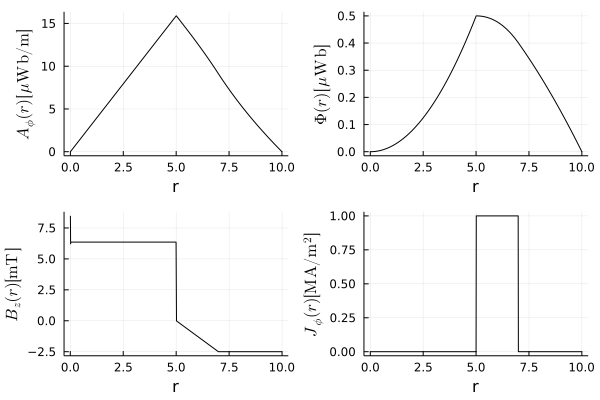

In [10]:
# Construct the 1D mesh
xmin = 0;
xmax = 10e-3;

N = 1000; Np1 = N+1; h = (xmax - xmin)/N; h2=h*h; 
x = Vector(xmin:h:xmax); 
xmid = x[1:end-1].+h/2; 

# Define source and material
f = 1e6 .* (x .< 7e-3) .* (5e-3 .< x);

mu0 = 4*pi*1e-7;
mu1 = 1e4*mu0;
mu(x) = mu0 .+ (mu1 - mu0) .* (x .> 0) - (mu1 - mu0) .* (x .> 5e-3);
D = mu(xmid);
E = mu(x);

D = 1 ./ D; E = 1 ./ E;

# Construct A and B matrices
B = Float64[i==j ? (-1.)/h : i==j-1 ? 1/h : 0 for i = 1:N, j=1:Np1]
BT = Transpose(B)
C = 1/(2*h) * Tridiagonal(ones(N), zeros(N+1), -ones(N));

A  = BT*Diagonal(xmid.*D)*B + 2 * C * Diagonal(E); 

# Boundary conditions
A[1,:] = zeros(N+1);
A[1,1] = 1;            A[1,2] = 0;             f[1] = 0;   # Axisymmetry
A[end,end-1] = 0;      A[end,end] = 1;         f[end] = 0; # A=0 

# 
u   = A \ f;
u   = u .* x;
ux   = (B * (x .* u)) ./ xmid;

p1 = plot(x * 1e3, u * 1e6, color = :black, xlabel = "r", ylabel = L"A_{\phi}(r) [\mathrm{\mu Wb/m}]", legend = false);
p2 = plot(x * 1e3, 2*pi*x.*u * 1e6, color = :black, xlabel = "r", ylabel = L"\Phi(r) [\mathrm{\mu Wb}]", legend = false);
p3 = plot(xmid * 1e3, ux * 1e3, color = :black, xlabel = "r", ylabel = L"B_z(r) \mathrm{[mT]}", legend = false);
p4 = plot(x * 1e3, f * 1e-6, color = :black, xlabel = "r", ylabel = L"J_{\phi}(r) \mathrm{[MA/m^2]}", legend = false);

plot(p1, p2, p3, p4)

# Example 3: Coil with Core and Airgap

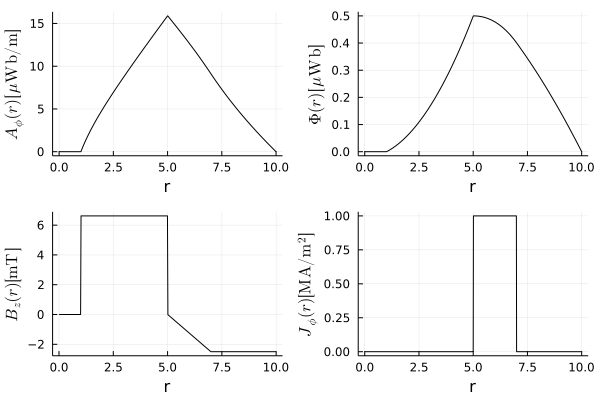

In [2]:
# Construct the 1D mesh
xmin = 0;
xmax = 10e-3;

N = 1000; Np1 = N+1; h = (xmax - xmin)/N; h2=h*h; 
x = Vector(xmin:h:xmax); 
xmid = x[1:end-1].+h/2; 

# Define source and material
f = 1e6 .* (x .< 7e-3) .* (5e-3 .< x);

mu0 = 4*pi*1e-7;
mu1 = 1e4*mu0;
D = mu0 .+ (mu1 - mu0) .* (xmid .> 1e-3) - (mu1 - mu0) .* (xmid .> 5e-3);
E = mu0 .+ (mu1 - mu0) .* (x .> 1e-3) - (mu1 - mu0) .* (x .> 5e-3);

D = 1 ./ D; E = 1 ./ E;

# Construct A and B matrices
B = Float64[i==j ? (-1.)/h : i==j-1 ? 1/h : 0 for i = 1:N, j=1:Np1]
BT = Transpose(B)
C = 1/(2*h) * Tridiagonal(ones(N), zeros(N+1), -ones(N));

A  = BT*Diagonal(xmid.*D)*B + 2 * C * Diagonal(E); 

# Boundary conditions
A[1,:] = zeros(N+1);
A[1,1] = 1;            A[1,2] = 0;             f[1] = 0;   # Axisymmetry
A[end,end-1] = 0;      A[end,end] = 1;         f[end] = 0; # A=0 

# 
u   = A \ f;
u   = u .* x;
ux   = (B * (x .* u)) ./ xmid;

p1 = plot(x * 1e3, u * 1e6, color = :black, xlabel = "r", ylabel = L"A_{\phi}(r) [\mathrm{\mu Wb/m}]", legend = false);
p2 = plot(x * 1e3, 2*pi*x.*u * 1e6, color = :black, xlabel = "r", ylabel = L"\Phi(r) [\mathrm{\mu Wb}]", legend = false);
p3 = plot(xmid * 1e3, ux * 1e3, color = :black, xlabel = "r", ylabel = L"B_z(r) \mathrm{[mT]}", legend = false);
p4 = plot(x * 1e3, f * 1e-6, color = :black, xlabel = "r", ylabel = L"J_{\phi}(r) \mathrm{[MA/m^2]}", legend = false);

plot(p1, p2, p3, p4)